In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('GlobalCity.csv')

In [4]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [6]:
plt.plot(data['dt'],data['AverageTemperature'])
plt.show()

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 640x480 with 1 Axes>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [8]:
data = data.dropna(subset=['AverageTemperature'])
plt.plot(data['dt'], data['AverageTemperature'])
plt.show()


OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 640x480 with 1 Axes>

In [9]:
data['dt'] = pd.to_datetime(data['dt'])
plt.plot(data['dt'], data['AverageTemperature'])
plt.show()


OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 640x480 with 1 Axes>

In [10]:
data


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


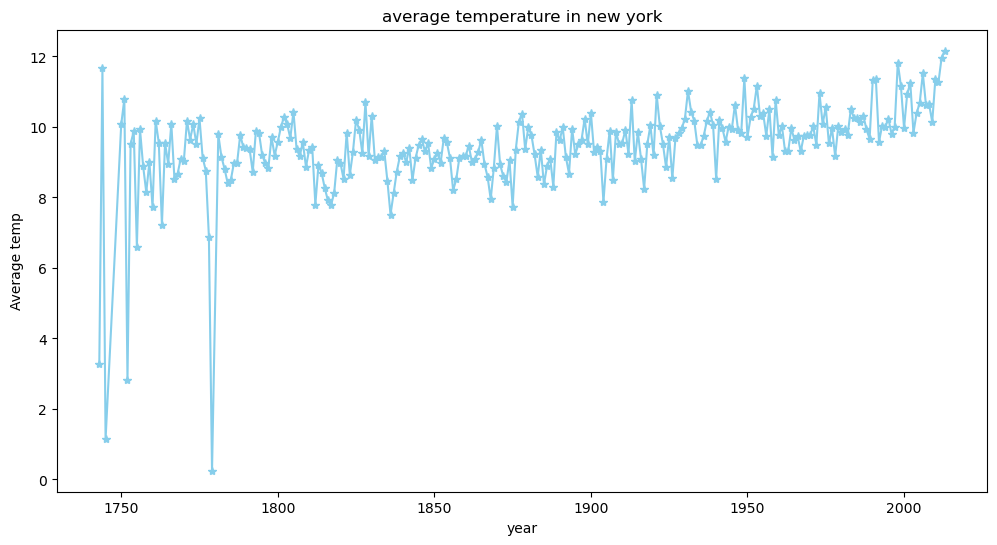

In [17]:
city_data=data[data['City']=='New York'].copy()
city_data['dt']=pd.to_datetime(city_data['dt'],errors='coerce')
city_data['Year']=city_data['dt'].dt.year
annual_avg=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(annual_avg['Year'],annual_avg['AverageTemperature'],linestyle='-',color='skyblue',marker='*')
plt.title('average temperature in new york')
plt.xlabel('year')
plt.ylabel('Average temp')
plt.show()

In [29]:
data['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

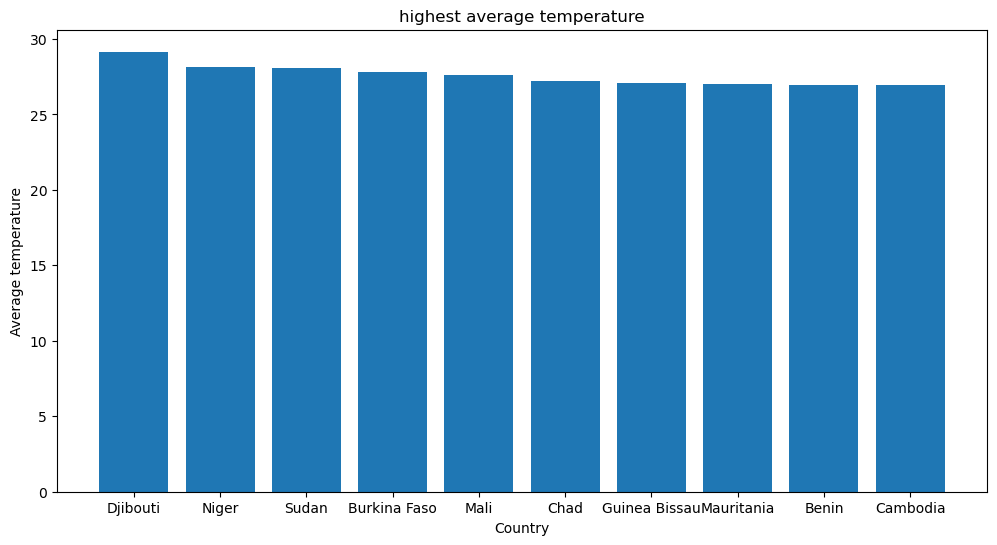

In [36]:
avg_country=data.groupby('Country')['AverageTemperature'].mean().reset_index()
avg_country=avg_country.dropna()
top_countries=avg_country.sort_values(by='AverageTemperature',ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_countries['Country'],top_countries['AverageTemperature'])
plt.title('highest average temperature')
plt.xlabel('Country')
plt.ylabel('Average temperature')
plt.show()

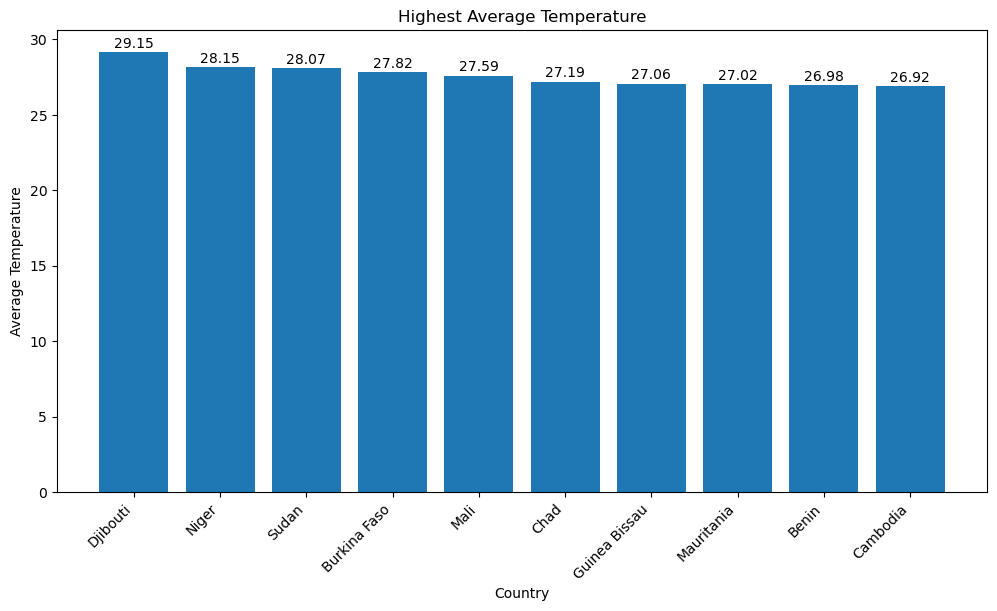

In [37]:
import matplotlib.pyplot as plt

# Assuming avg_country and top_countries are already created
plt.figure(figsize=(12,6))

# Plotting the bar chart
plt.bar(top_countries['Country'], top_countries['AverageTemperature'])

# Adding the average temperature value on top of each bar
#plt.text(): This function places the text on the plot at specified x and y coordinates. 
#Here, x=i places the text in the center of each bar, and y=top_countries['AverageTemperature'].iloc[i] + 0.1 ensures the text
#is just above the bar. The + 0.1 adds a little space above the bar so that the text is visible and doesn't overlap.
#s=f"{value:.2f}": This formats the temperature to two decimal places for cleaner display
for i in range(len(top_countries)):
    plt.text(x=i, y=top_countries['AverageTemperature'].iloc[i] + 0.1, 
             s=f"{top_countries['AverageTemperature'].iloc[i]:.2f}", 
             ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Highest Average Temperature')
plt.xlabel('Country')
plt.ylabel('Average Temperature')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [42]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


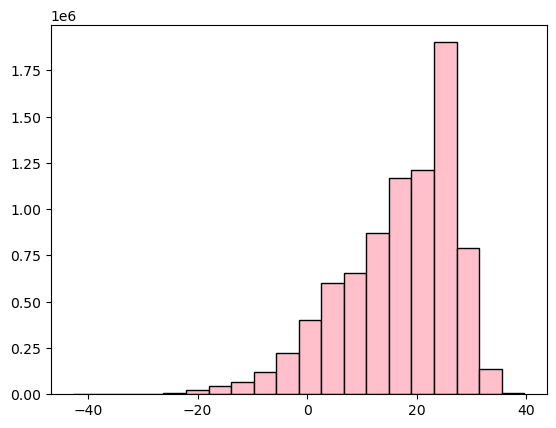

<Figure size 1200x600 with 0 Axes>

In [45]:
avg_temp=data['AverageTemperature'].dropna()
plt.hist(avg_temp,bins=20,color='pink',edgecolor='black')
plt.figure(figsize=(12,6))
plt.show()


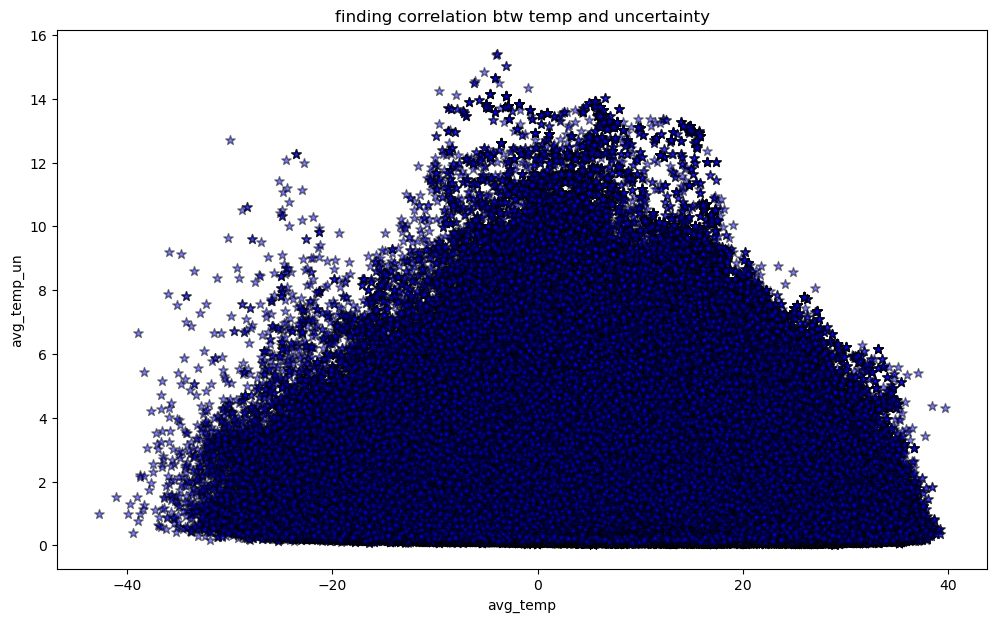

In [51]:
avg_temp=data['AverageTemperature'].dropna()
avg_temp_un=data['AverageTemperatureUncertainty'].dropna()
plt.figure(figsize=(12,7))
plt.scatter(avg_temp,avg_temp_un,color='blue',marker='*',alpha=0.5,edgecolor='black',s=50)
plt.title('finding correlation btw temp and uncertainty')
plt.xlabel('avg_temp')
plt.ylabel('avg_temp_un')
plt.show()


In [52]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


Summary Statistics for Average Temperature:
count    48.000000
mean      6.118042
std       6.178777
min      -2.732000
25%       0.262500
50%       5.331000
75%      11.220250
max      16.305000
Name: AverageTemperature, dtype: float64


C:\Users\CVR\AppData\Local\Temp\ipykernel_7284\3816772822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['dt'] = pd.to_datetime(country_data['dt'])  # Ensure 'dt' is a datetime column


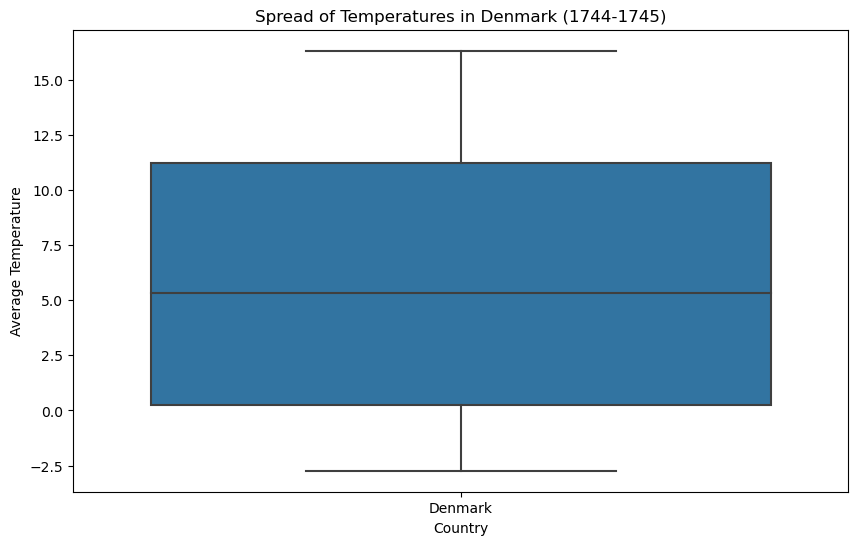

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Let's filter for a specific country (e.g., "Denmark") and time period (e.g., 1744-1745)

# Step 1: Filter the data for a specific country and period
country_data = data[data['Country'] == 'Denmark']
country_data['dt'] = pd.to_datetime(country_data['dt'])  # Ensure 'dt' is a datetime column

# Filter for a given time period (e.g., 1744-1745)
time_filtered_data = country_data[(country_data['dt'].dt.year >= 1744) & (country_data['dt'].dt.year <= 1745)]

# Step 2: Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='AverageTemperature', data=time_filtered_data)

# Step 3: Summarize the data
temperature_summary = time_filtered_data['AverageTemperature'].describe()

# Print the summary
print("Summary Statistics for Average Temperature:")
print(temperature_summary)

# Step 4: Display the plot
plt.title(f"Spread of Temperatures in Denmark (1744-1745)")
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.show()


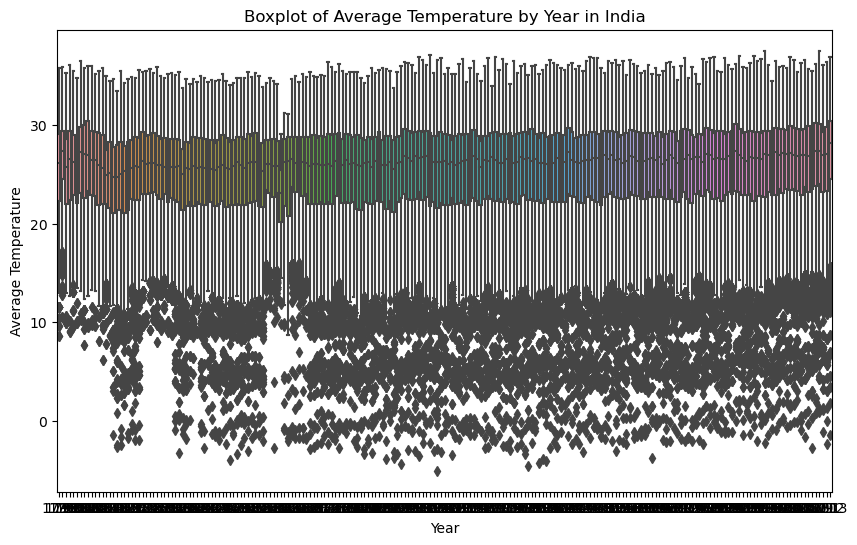

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
country_data = data[data['Country'] == 'India'].copy()

# Convert 'dt' to datetime and handle errors
country_data['dt'] = pd.to_datetime(country_data['dt'], errors='coerce')

# Drop rows with invalid 'dt' values
country_data = country_data.dropna(subset=['dt'])

# Extract the 'Year' from the 'dt' column
country_data['Year'] = country_data['dt'].dt.year

# Filter relevant columns and drop rows with missing 'AverageTemperature'
country_data = country_data[['Year', 'AverageTemperature']].dropna()

# Group the data by 'Year' and get the 'AverageTemperature' for each year
grp = [group['AverageTemperature'] for _, group in country_data.groupby('Year')]

# Step 1: Create the boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=country_data['Year'], y=country_data['AverageTemperature'])

# Step 2: Add title and labels
plt.title('Boxplot of Average Temperature by Year in India')
plt.xlabel('Year')
plt.ylabel('Average Temperature')

# Show the plot
plt.show()


In [60]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


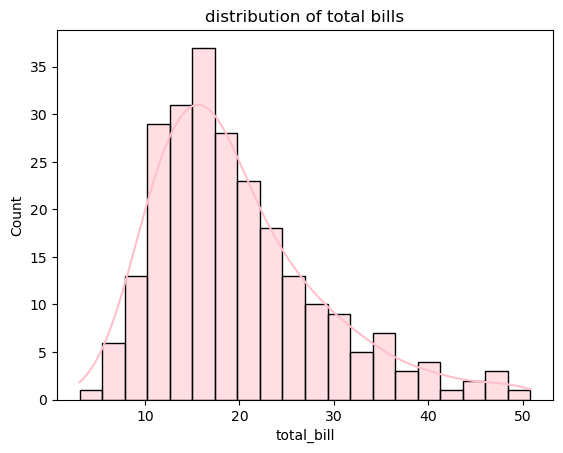

In [65]:
sns.histplot(data=tips,x='total_bill',kde=True,bins=20,color='pink')
plt.title("distribution of total bills")
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_7284\2327239962.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tips,x='total_bill',shade=True,color='blue')


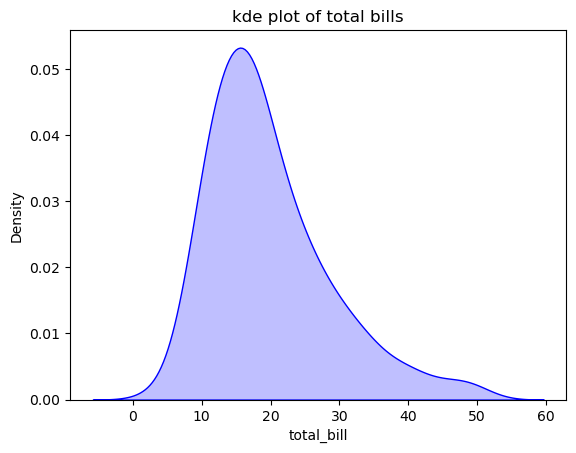

In [66]:
sns.kdeplot(data=tips,x='total_bill',shade=True,color='blue')
plt.title("kde plot of total bills")
plt.show()

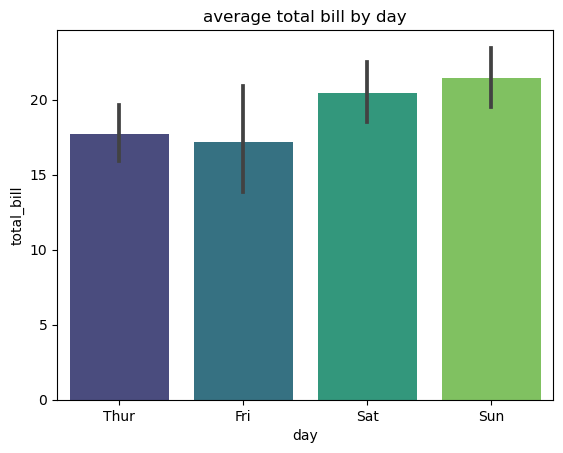

In [68]:
sns.barplot(data=tips,x='day',y='total_bill',palette='viridis')
plt.title('average total bill by day')
plt.show()

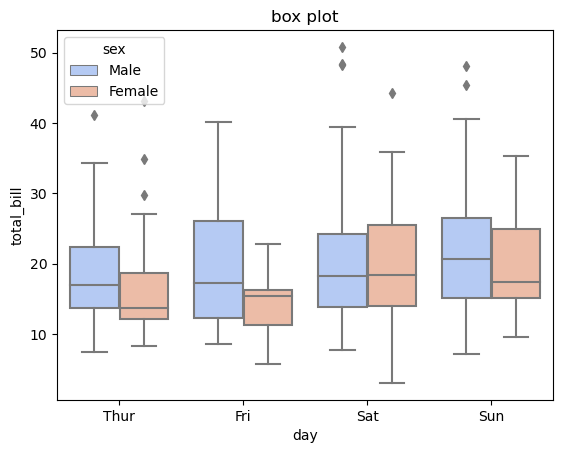

In [69]:
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex',palette='coolwarm')
plt.title('box plot')
plt.show()

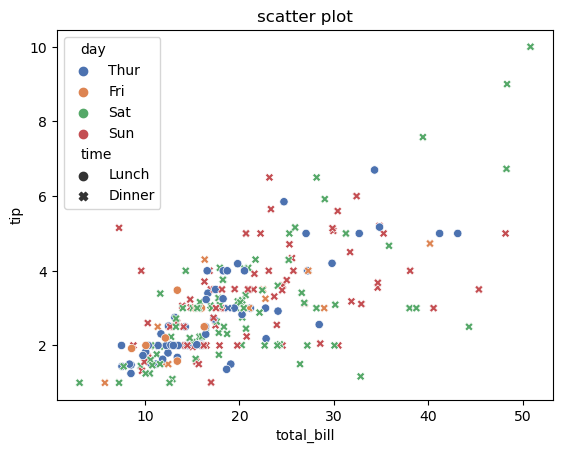

In [70]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='day',style='time',palette='deep')
plt.title('scatter plot')
plt.show()


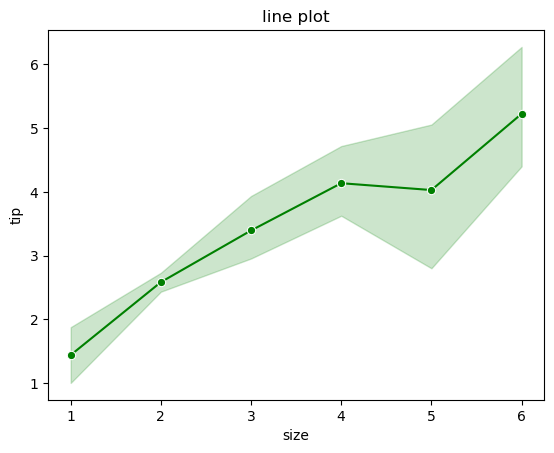

In [71]:
sns.lineplot(data=tips,x='size',y='tip',marker='o',color='green')
plt.title('line plot')
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


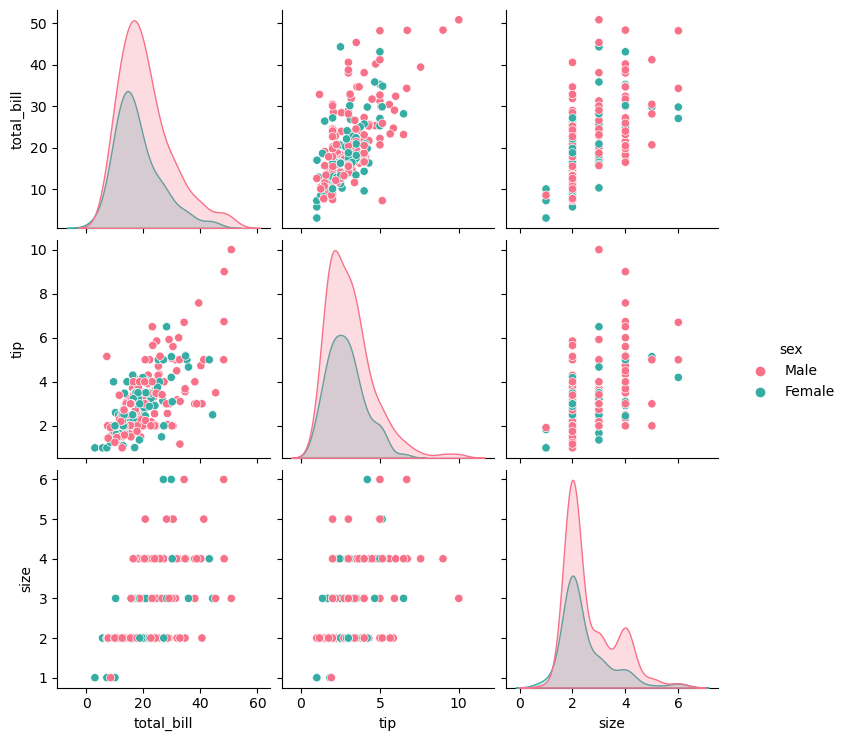

In [72]:
sns.pairplot(data=tips,hue='sex',palette='husl')
plt.show()

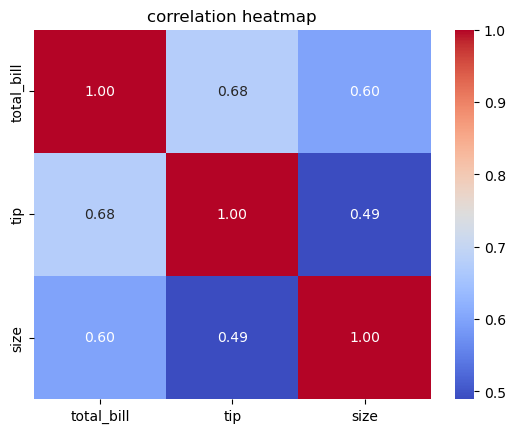

In [76]:
num_data=tips.select_dtypes(include=['float64','int64'])
corr_mat=num_data.corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('correlation heatmap')
plt.show()